# Lecture 9 - Preprocessing and Cleaning: Text Normalization and Natural Language Processing

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Announcements:
* Data Ethics 2 - two articles to read and a short reflection to write before this coming Wednesday


# Goals:
* Know the meaning and purpose of some basic text normalization operations (from natual language processing):
  * Sentence tokenization
  * Lowercasing, contractions, punctuation, canonicalization
  * Stemming
  * Lemmatization
  * Stopword removal
* Get some hands-on practice using the above

# Start of Quarter Survey

Responses to the survey prompt: 
> Name one hobby or activity you enjoy outside of school.

In [2]:
hob = pd.read_csv("https://facultyweb.cs.wwu.edu/~wehrwes/courses/data311_25f/lectures/L09/hobbies.csv", header=None)
hob

0
0   I love riding my bike, recently I have been en...
1   I like hanging out with friends by going on wa...
2   I love reading eastern fantasy/cultivation nov...
3                                             Hiking!
4   I love singing! It's technically in-school, bu...
5                                  I like video games
6   I manage a home media server in my downtime, i...
7                                              Gaming
8   I enjoy long distance running! I've been doing...
9                                      Rock climbing 
10                                         Volleyball
11                                playing bass guitar
12              I like to play the guitar and to cook
13                                       Video Games 
14  I enjoy biking and hiking outdoors, and readin...
15                                         Basketball
16                                    Mountain biking
17                                            Reading
18                       Archery. Painting. Reading. 
19  I really love baseball. My parents and I watch...
20                                            Reading
21                                             Hiking
22                                      rock climbing
23                                   Golf and Swiming
24                                           Lifting!
25  I enjoy working out, hanging out with friends,...

#### What I'd like to do:

In [10]:
hob[0].plot.hist()

TypeError: no numeric data to plot

## Text Normalization

**Text normalization**: transforming text into standard or canonical forms.

Often needed to convert text data into tabular data.

As a rule, natural language presents many challenges for seeming simple tasks.

#### Tokenization

Roughly defined: splitting a string into linguistically meaningful pieces.

For each of the following, think of an example piece of text where the naive approach does not give the desired result.

Word tokenization: break into word-ish pieces
 - Naive: split on spaces. `str.split(' ')`
 - **Failure cases**:
   - "    The paragraph starts here."
   - "The paragraphstarts here."
   - The pargraph starts here---yet it's not over yet!"
   - "I like rock-climbing."

- **Sentence tokenization**: breaking up paragraphs (or larger) into sentences.
  - Naive: split on periods. `str.split('. ')`
  - **Failure cases**:
    - "Who thought this was a good idea? I didn't."
    - "Oh no..."
    - "Mr. Rogers is the coolest."
    - "J.R.R. Tolkien wrote some stuff."
    - The sentence ends with "a quote."

- **Lowercasing**
  - Naive: `str.lower()`
  - **Failure cases**:
    - Scott vs scott
    - Joy vs joy, River vs river
    - NumPy?
    - "I have a 20 MBps internet connection."

In [11]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.8 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
!pip install spacytextblob

Defaulting to user installation because normal site-packages is not writeable


### Tokenization - Example:

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [15]:

text = "Dr. Wehrwein doesn't work for the F.B.I. His résumé wouldn't qualify him for such a job."

ans = nlp("Dr. Wehrwein doesn't work for the F.B.I. His résumé wouldn't qualify him for such a job.")
list(ans)

[Dr.,
 Wehrwein,
 does,
 n't,
 work,
 for,
 the,
 F.B.I.,
 His,
 résumé,
 would,
 n't,
 qualify,
 him,
 for,
 such,
 a,
 job,
 .]

In [16]:
list(ans.sents) # sentence tokenization

[Dr. Wehrwein doesn't work for the F.B.I.,
 His résumé wouldn't qualify him for such a job.]

### Other Text Normalization Operations

- **Expand contractions**; instead of tokenizing, you could preprocess these away
  - the tokenizer expanded `doesn't` to `does, n't`
  - Could instead first expand it to "does not"
- **Canonicalize language variants**; e.g., color vs colour
- **Converting numerical representation** of words to numbers
  - "two and a half" -> 2.5
  - four million" -> 4,000,000 or 4000000
- **Stripping accents or unicode characters** 
  - E.g., résumé to resume.


- Stripping punctuation
  - If it isn't important for your task, could strip all punctuation out.
  - Beware of side effects; e.g., 192.168.1.1 -> 19216811.

In [17]:
localhost = "Localhost is 127.0.0.1, whereas your home router is traditionally configured to be 192.168.0.1."
ans = nlp(localhost)
list(ans)


[Localhost,
 is,
 127.0.0.1,
 ,,
 whereas,
 your,
 home,
 router,
 is,
 traditionally,
 configured,
 to,
 be,
 192.168.0.1,
 .]

In [18]:
tok = list(ans)
tok[-1].is_punct

True

- Removing stopwords
  - Stopwords: common function words like "to" "in" "the"
  - For some tasks they aren't important or relevant 
    - E.g., topic detection

In [19]:
tok = [t for t in ans if (not t.is_stop and not t.is_punct)]
tok

[Localhost, 127.0.0.1, home, router, traditionally, configured, 192.168.0.1]


#### Stemming
Convert words to word stem (even if the stem itself isn't a whole word). 
- E.g., argue, argued, argues, arguing all replaced by argu.
- Works without knowing the part of speech.

#### Lemmatization
Like stemming, but attempts to infer part of speech and use custom rules based on part of speech.

#### Part-of-speech tagging

In [20]:
hobby = hob.iloc[0,0]
hobby

'I love riding my bike, recently I have been enjoying riding my dirt jumper (type of bike made for dirt jumps) to the bike park at the Civic sport complex area.\xa0'

In [21]:
ans = nlp(hobby)
tok = [t for t in ans if (not t.is_stop and not t.is_punct)]
pd.DataFrame({"Token" : [t for t in tok],
              "Lemma" : [t.lemma_ for t in tok], 
              "POS"   : [t.pos_ for t in tok]})

Token     Lemma    POS
0       love      love   VERB
1     riding      ride   VERB
2       bike      bike   NOUN
3   recently  recently    ADV
4   enjoying     enjoy   VERB
5     riding      ride   VERB
6       dirt      dirt   NOUN
7     jumper    jumper   NOUN
8       type      type   NOUN
9       bike      bike   NOUN
10      dirt      dirt   NOUN
11     jumps      jump   NOUN
12      bike      bike   NOUN
13      park      park   NOUN
14     Civic     Civic  PROPN
15     sport     sport   NOUN
16   complex   complex    ADJ
17      area      area   NOUN
18                      SPACE

#### Noun phrase parsing

In [22]:
list(ans.noun_chunks)

[I,
 my bike,
 I,
 my dirt jumper,
 type,
 bike,
 dirt jumps,
 the bike park,
 the Civic sport complex area]

#### Named entity recognition

In [23]:
ans.ents

(Civic,)

In [27]:
nlp("Jude Law visited NYC. Air Force One happened to be parked at JFK.".lower()).ents

(air force one, jfk)

#### Sentiment analysis

In [24]:
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe("spacytextblob")


In [25]:
yay = nlp("Today is a good day.")
boo = nlp("I'm feeling sad.")

print(yay._.blob.polarity)
print(boo._.blob.polarity)

0.7
-0.5


Text(0.5, 9.444444444444438, 'Polarity')

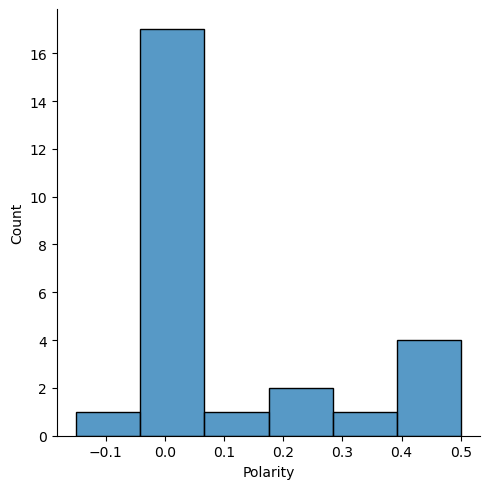

In [26]:
sns.displot(hob[0].apply(lambda x: nlp(x)._.blob.polarity))
plt.gca().set_xlabel("Polarity")

Tools for text normalization?
- Python regular expressions (e.g., find and replace)
- Linux commandline tool `sed` (stream editor) or `tr` (translate)
- NLP toolkits; e.g., `spacy`, `nltk` (support tokenizing, stemming, lemmatizing, etc.)
